In [31]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
'''
Gets Pandas Dataframe of gas stations with the longetude, latitude and station number as index
'''
def drawMap(stations):
    # Download map data from here http://biogeo.ucdavis.edu/data/gadm2.8/shp/DEU_adm_shp.zip
    # Read map data 
    fname = 'maps/DEU_adm1.shp'
    adm1_shapes = list(shpreader.Reader(fname).geometries())

    # Create figure 
    fig = plt.figure(figsize=(20, 30))
    ax = plt.axes(projection=ccrs.PlateCarree())

    plt.title('Germany')
    ax.coastlines(resolution='10m')

    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                      edgecolor='gray', facecolor='lightgray', alpha=0.5)

    ax.set_extent([4, 16, 47, 56], ccrs.PlateCarree())
    
    # Draw Gas Stations 
    for index, row in stations.iterrows():
        ax.plot(row["Latitude"], row["Longitude"], 'bo', markersize=3, transform=ccrs.Geodetic())
        ax.text(row["Latitude"], row["Longitude"], str(index), color="blue", fontsize=15)

    plt.show()
    
    
def readGasStations(numbers):
    stations = pd.read_csv('F:/Workspace/InformatiCup2018/Eingabedaten/Tankstellen.csv', sep=';', index_col=0,
                          names=["Name", "Provider", "Streetname", "Housenumber", "Zipcode", "City", "Longitude", "Latitude"])
    
    return stations.iloc[numbers, -2:]

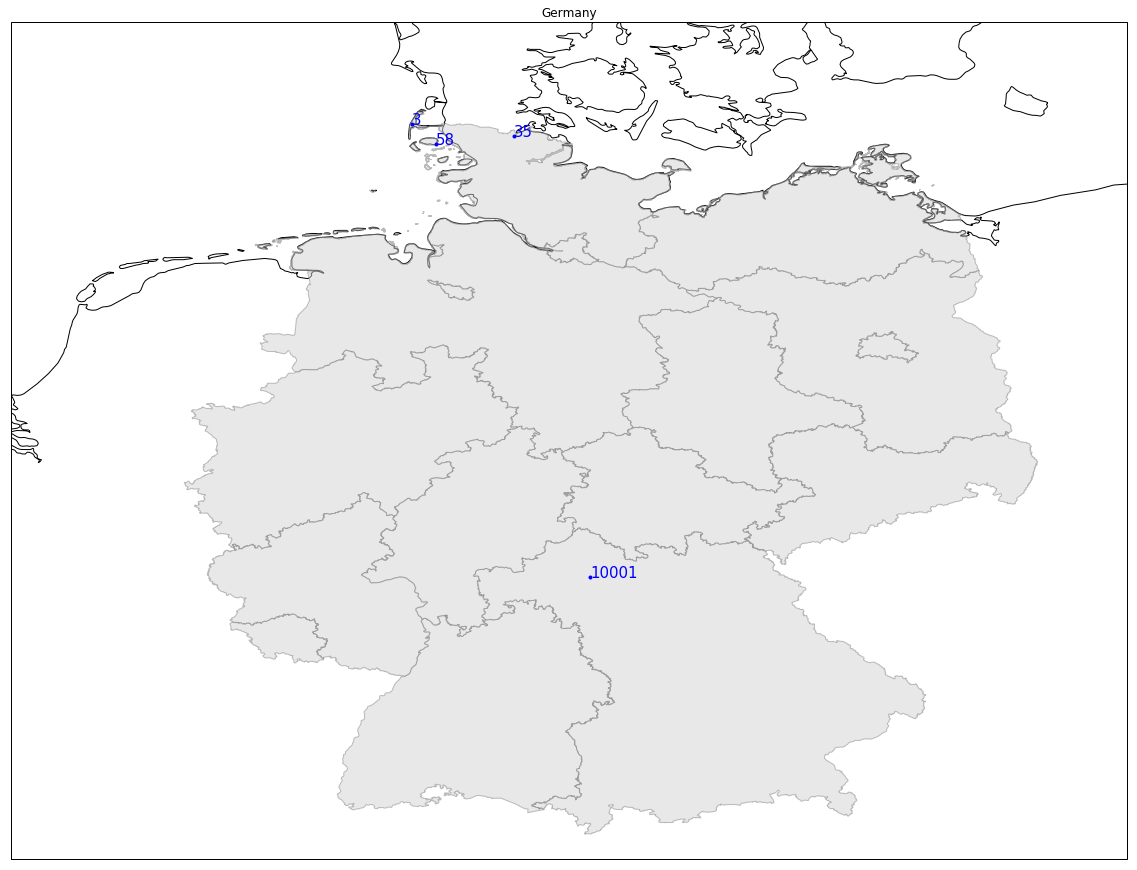

In [66]:
drawMap(readGasStations([2,34,57,10000]))#zip([8.3333, 9.], [48.8888,50.], [1, 10]))